Competition SumEMAry
Please eEMAil a zipped folder containing all competition EMAterials

*   Submissions are to be eEMAiled to desasubmissions@gEMAil.com
*   The **final submission should include model code, any rough work used,
datasets (preferably .csv or .xlsx), a 1-page sumEMAry of the model project,
and model validation scores.**
*   Submissions are to be eEMAiled **no later than October 17th, 2024 @ 12pm EST**
*   Extra points awarded to those who leverage the Dinnect community group at any point to initiate dialogue, other than sharing solutions. Anyone who shares solutions. or any tips regarding the solution will be autoEMAtically disqualified.
*   The competition is virtual, and you can complete it on your own schedule
*   You can use any language you like (i.e. Python, R…) to complete the competition
*   Submissions will be **judged based on the creativity of the project, choice of model, and of course, model validation**

Your job, in this competition:
*   assess the overall sentiment of the portfolio of stocks below by leveraging any datasets you deem necessary.
*   assess the overall sentiment of the portfolio of stocks below by
leveraging any datasets you deem necessary
*   keep in their portfolios that will have the highest ROI.
*   leverage publicly available data/APIs to build a time-series dataset (most recent date as of September 26th, 2024) with factors that can be used to accurately predict stock price movements
*   **Encompassing sentiment-based data. We expect that you will
leverage social media data/APIs as part of your submission.**
*   we would expect some form of EMAchine Learning to be incorporated into your submission.
*   To simplify the target variable, we ask that you **use a binary classifier (1/0) that denotes whether there was a price increase (1) or not (0)
from the previous trading day.**
*   As for model validation, you are free to use any metric you
deem important to assess the accuracy of your EMAchine Learning model(s).



The Idea that im going to use are
*   Stocks Data
*   News Sentimental Data
*   Social Media Sentimental Data

The EMAin idea im trying to achieve are as follows:
1.   Data Preprocess:
*   Calculate the average open and close prices
*   Add technical indicator into the dataset, since im working with data from 28th September, there's big chance i will use Either EMA5 or EMA, RSI, Bollinger Bands, and Momentum
*   List item
*   Gather sentimental data from both news and social media, and later clean it using VADER or BERT depending on the choice i see fit later to extract sentimental scores
2.   Feature Extraction:
*   The feature that we will use here are
*   List item












In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

Ticker = "APLD"

In [ ]:
StockData1 = yf.Ticker(Ticker)

# **APLD**

In [ ]:
import pandas as pd

HistSD1 = StockData1.history(period='6mo')

# Reset the index to EMAke 'Date' a column (if it is not already a column)
HistSD1.reset_index(inplace=True)

HistSD1['Date'] = pd.to_datetime(HistSD1['Date'])

# Convert to 'yyyy-mm-dd' forEMAt (this removes the time and timezone)
HistSD1['Date'] = HistSD1['Date'].dt.strftime('%Y-%m-%d')

HistSD1['Average'] = (HistSD1['Close'] + HistSD1['Open']) / 2

timeframe = 7

# Calculate Exponential Moving Average (EEMA)
HistSD1['EMA'] = HistSD1['Average'].ewm(span=timeframe, adjust=False).mean()

# Add RSI function
def compute_RSI(data, window=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

# Calculate RSI
HistSD1['RSI'] = compute_RSI(HistSD1)

# Add Bollinger Bands using the new EEMA instead of EMA
HistSD1['stddev'] = HistSD1['Close'].rolling(window=timeframe).std()
HistSD1['Upper Band'] = HistSD1['EMA'] + (HistSD1['stddev'] * 2)
HistSD1['Lower Band'] = HistSD1['EMA'] - (HistSD1['stddev'] * 2)

# Add Momentum
HistSD1['Momentum'] = HistSD1['Close'] - HistSD1['Close'].shift(10)

# Lagged features
HistSD1['Lag1'] = HistSD1['Average'].shift(1)

# Select the desired columns: Open, Close, High, Low, Volume, Average, EEMA, RSI, Momentum
SelectedColumn1 = HistSD1[['Date', 'Open', 'Close', 'High', 'Low', 'Volume', 'Average', 'Lag1', 'EMA', 'RSI', 'Momentum']]

# Display the selected columns
print(SelectedColumn1)

           Date    Open  Close  High    Low    Volume  Average    Lag1  \
0    2024-04-15  2.7000  2.515  2.72  2.490   4951100   2.6075     NaN   
1    2024-04-16  2.5100  2.450  2.53  2.390   4752700   2.4800  2.6075   
2    2024-04-17  2.4800  2.400  2.48  2.390   2458500   2.4400  2.4800   
3    2024-04-18  2.4000  2.390  2.46  2.360   2690100   2.3950  2.4400   
4    2024-04-19  2.4000  2.470  2.52  2.370   3208500   2.4350  2.3950   
..          ...     ...    ...   ...    ...       ...      ...     ...   
122  2024-10-08  7.0500  7.850  7.99  6.900  10339500   7.4500  7.2250   
123  2024-10-09  7.8600  7.400  7.91  7.310  13323200   7.6300  7.4500   
124  2024-10-10  7.4900  6.890  8.09  6.660  24416400   7.1900  7.6300   
125  2024-10-11  6.9100  7.280  7.29  6.902   9052400   7.0950  7.1900   
126  2024-10-14  7.3988  7.725  7.73  7.150   5736156   7.5619  7.0950   

          EMA        RSI  Momentum  
0    2.607500        NaN       NaN  
1    2.575625        NaN       NaN  


In [ ]:
HistSD1.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Average,EMA,RSI,stddev,Upper Band,Lower Band,Momentum,Lag1
count,127.000000,127.000000,127.000000,127.000000,1.270000e+02,127.0,127.0,127.000000,127.000000,114.000000,121.000000,121.000000,121.000000,117.000000,126.000000
mean,4.904046,5.207142,4.667063,4.939370,8.343169e+06,0.0,0.0,4.921708,4.807525,57.422973,0.408805,5.737601,4.102380,0.420684,4.900754
std,1.507595,1.630043,1.427383,1.537979,1.423507e+07,0.0,0.0,1.511144,1.421874,15.033610,0.268399,1.654912,1.242218,1.142270,1.498538
min,2.400000,2.460000,2.360000,2.390000,1.268400e+06,0.0,0.0,2.395000,2.487529,19.658121,0.082347,2.993442,2.147288,-2.830000,2.395000
25%,3.940000,4.110000,3.830000,3.955000,3.349650e+06,0.0,0.0,3.975000,4.019185,46.853888,0.204112,4.666582,3.292932,-0.305000,3.975000
50%,4.530000,4.780000,4.250000,4.550000,4.895400e+06,0.0,0.0,4.495000,4.389953,61.162769,0.335050,5.205984,3.814439,0.420000,4.492500
75%,6.100000,6.515000,5.752500,6.055000,9.430400e+06,0.0,0.0,6.020000,5.874888,68.715235,0.542170,7.067616,4.991446,1.180000,5.998750
max,8.260000,8.785000,8.080000,8.250000,1.498899e+08,0.0,0.0,8.225000,7.805272,85.310738,1.453105,9.311987,7.397047,2.830000,8.225000


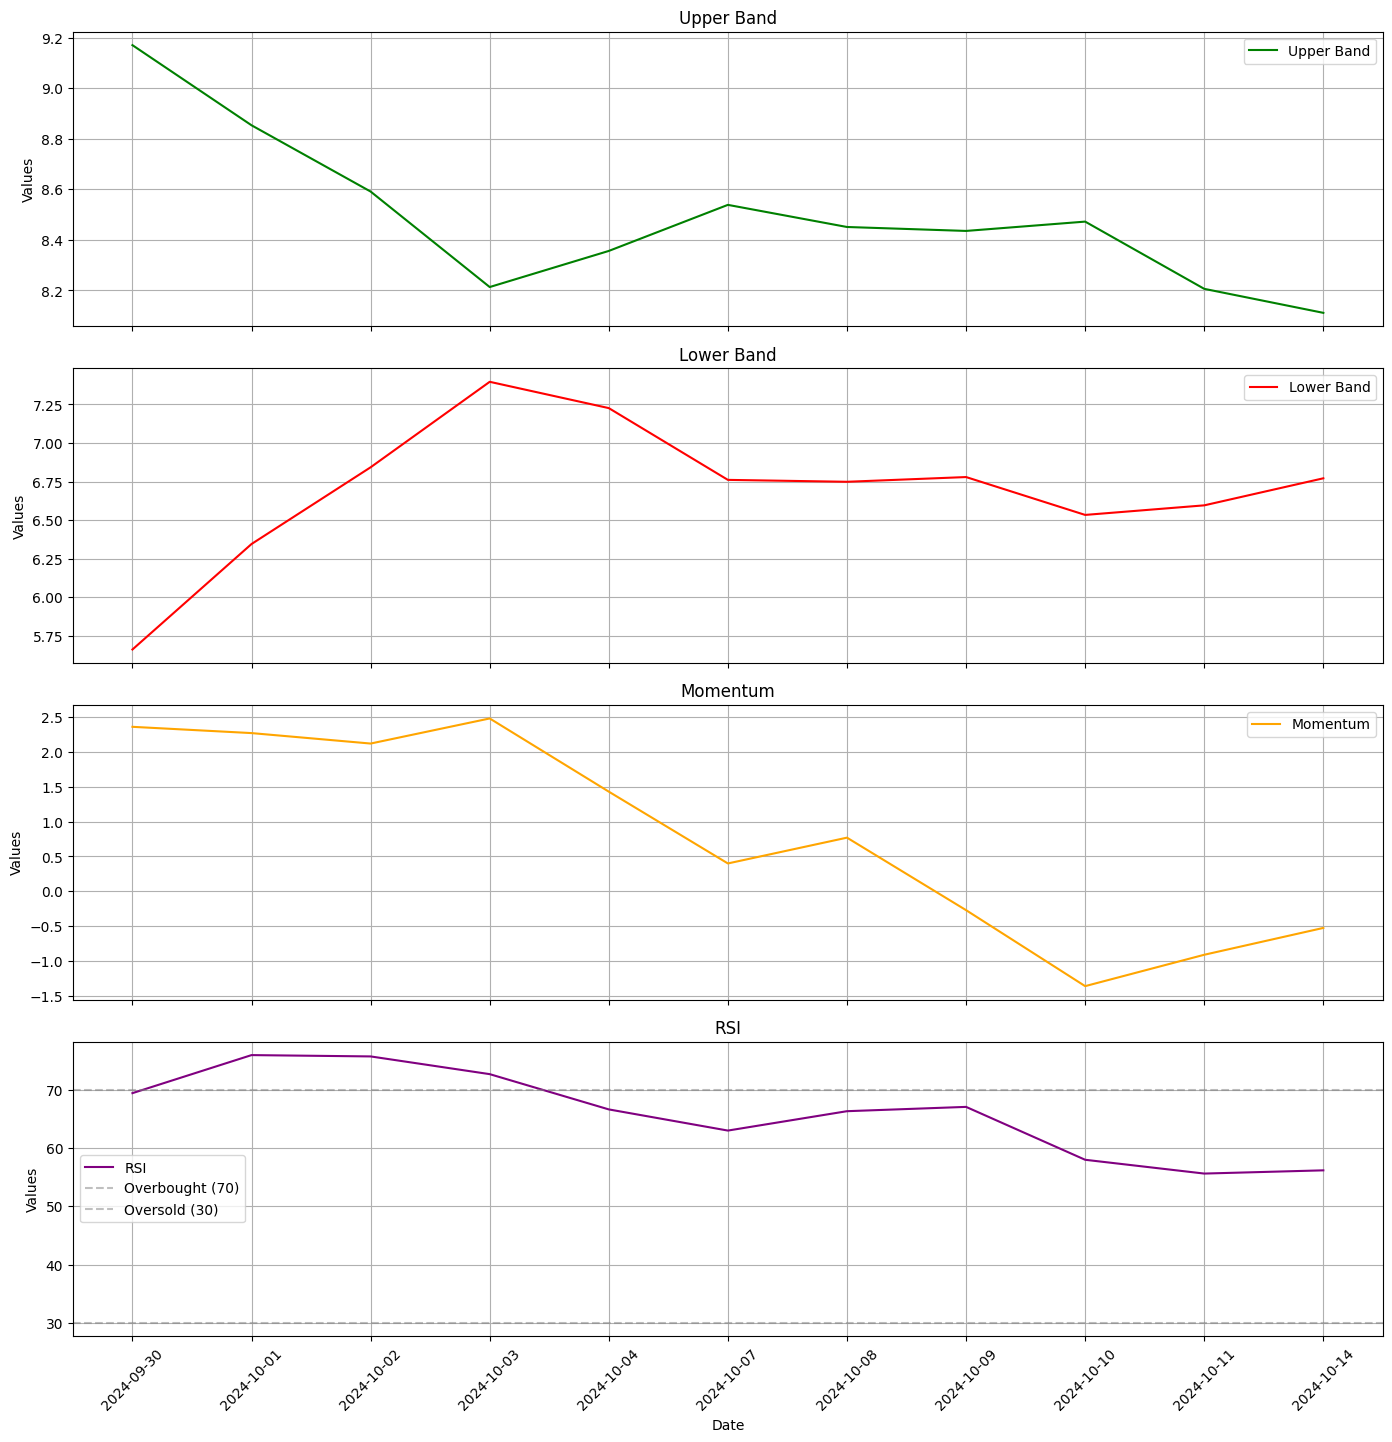

In [ ]:
import matplotlib.pyplot as plt

start_date = '2024-09-28'
df_filtered = HistSD1[HistSD1['Date'] >= start_date]

fig, axs = plt.subplots(4, 1, figsize=(14, 14), sharex=True)

# Plot Upper Band
axs[0].plot(df_filtered['Date'], df_filtered['Upper Band'], label='Upper Band', color='green')
axs[0].set_title('Upper Band')
axs[0].set_ylabel('Values')
axs[0].legend()
axs[0].grid()

# Plot Lower Band
axs[1].plot(df_filtered['Date'], df_filtered['Lower Band'], label='Lower Band', color='red')
axs[1].set_title('Lower Band')
axs[1].set_ylabel('Values')
axs[1].legend()
axs[1].grid()

# Plot Momentum
axs[2].plot(df_filtered['Date'], df_filtered['Momentum'], label='Momentum', color='orange')
axs[2].set_title('Momentum')
axs[2].set_ylabel('Values')
axs[2].legend()
axs[2].grid()

# Plot RSI
axs[3].plot(df_filtered['Date'], df_filtered['RSI'], label='RSI', color='purple')
axs[3].axhline(70, linestyle='--', color='gray', alpha=0.5, label='Overbought (70)')
axs[3].axhline(30, linestyle='--', color='gray', alpha=0.5, label='Oversold (30)')
axs[3].set_title('RSI')
axs[3].set_ylabel('Values')
axs[3].legend()
axs[3].grid()

# Set x-axis label for the last subplot
axs[3].set_xlabel('Date')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=HistSD1.index,
                                     open=HistSD1['Open'],
                                     high=HistSD1['High'],
                                     low=HistSD1['Low'],
                                     close=HistSD1['Close'])])
fig.update_layout(title='Candlestick Chart', xaxis_title='Date', yaxis_title='Price')

# Overlay the EMA line
fig.add_trace(go.Scatter(x=HistSD1.index,
                         y=HistSD1['EMA'],
                         mode='lines',
                         line=dict(color='blue', width=2),
                         name='50-Day EMA'))

# Customize layout
fig.update_layout(
    title='Candlestick Chart with 7-Day Moving Average (APLD)',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    hovermode='x unified',
    template='plotly_dark',
    xaxis_rangeslider_visible=False
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

HistSD1['Date'] = pd.to_datetime(HistSD1['Date'])

period = 7

decomposition = seasonal_decompose(HistSD1['Close'], model='multiplicative', period=period)

# Extract components: observed, trend, seasonal, and residual
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = go.Figure()

fig.add_trace(go.Scatter(x=HistSD1['Date'], y=trend, mode='lines', name='Trend Component', line=dict(color='green')))

fig.add_trace(go.Scatter(x=HistSD1['Date'], y=seasonal, mode='lines', name='Seasonal Component', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=HistSD1['Date'], y=residual, mode='lines', name='Residual Component', line=dict(color='red')))

# Customize layout
fig.update_layout(
    title="Interactive Decomposition Plot: Trend, Seasonal, and Residual",
    xaxis_title="Date",
    yaxis_title="Value",
    hovermode="x",
    plot_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=True
)

fig.show()


Sentiment Data:
Since i've extract sentiment data on seperate part, here i will only import the data and analyze and extract the important feature from it

From the cleaned data i only need stock and sentiment value

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stock_news_data = pd.read_csv('stock_news_data.csv')

In [ ]:
duplicates = stock_news_data[stock_news_data.duplicated(subset=['clean_description'])]

num_duplicates = duplicates.shape[0]
print(f"Number of duplicate rows in 'clean_description': {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate rows in 'clean_description':")
    print(duplicates[['clean_description']])
else:
    print("No duplicates found in 'clean_description'.")

Number of duplicate rows in 'clean_description': 3613
Duplicate rows in 'clean_description':
                                      clean_description
2     looking stock market analysis research prof re...
3     looking stock market analysis research prof re...
5     looking stock market analysis research prof re...
6     looking stock market analysis research prof re...
7     looking stock market analysis research prof re...
...                                                 ...
3629  thursday pasithea therapeutic corp nasdaqktta ...
3630  single patient mg cohort stage colon cancer re...
3631  looking stock market analysis research prof re...
3632  looking stock market analysis research prof re...
3633  looking stock market analysis research prof re...

[3613 rows x 1 columns]


In [ ]:
stock_news_data_cleaned = stock_news_data.drop_duplicates(subset=['clean_description'])

In [ ]:
stock_news_data_cleaned['datetime'] = pd.to_numeric(stock_news_data_cleaned['datetime'], errors='coerce')

# Check for invalid timestamps
valid_timestamp_condition = (
    (stock_news_data_cleaned['datetime'] >= 0) &
    (stock_news_data_cleaned['datetime'] <= pd.Timestamp.max.value // 1_000_000_000)
)

stock_news_data_cleaned = stock_news_data_cleaned.loc[valid_timestamp_condition].copy()

stock_news_data_cleaned['Date'] = pd.to_datetime(stock_news_data_cleaned['datetime'], unit='s', errors='coerce')

# Drop row when conversion failed
stock_news_data_cleaned.dropna(subset=['Date'], inplace=True)

stock_news_data_cleaned['Date'] = stock_news_data_cleaned['Date'].dt.strftime('%Y-%m-%d')

print(stock_news_data_cleaned[['datetime', 'Date']])

          datetime        Date
0     1.727961e+09  2024-10-03
1     1.727946e+09  2024-10-03
4     1.728040e+09  2024-10-04
9     1.727782e+09  2024-10-01
12    1.727694e+09  2024-09-30
14    1.728201e+09  2024-10-06
21    1.727944e+09  2024-10-03
1064  1.728391e+09  2024-10-08
1675  1.727988e+09  2024-10-03
2486  1.727433e+09  2024-09-27
2495  1.727435e+09  2024-09-27
2497  1.727089e+09  2024-09-23
2518  1.727345e+09  2024-09-26
2519  1.727093e+09  2024-09-23
2520  1.727079e+09  2024-09-23
2524  1.727391e+09  2024-09-26
2525  1.727381e+09  2024-09-26
2526  1.727373e+09  2024-09-26
2527  1.727355e+09  2024-09-26
2528  1.727349e+09  2024-09-26


<ipython-input-170-1687eb4365f1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
stock_news_data_cleaned['datetime'] = pd.to_numeric(stock_news_data_cleaned['datetime'], errors='coerce')

valid_timestamp_condition = (
    (stock_news_data_cleaned['datetime'] >= 0) &
    (stock_news_data_cleaned['datetime'] <= pd.Timestamp.max.value // 1_000_000_000)
)

stock_news_data_cleaned = stock_news_data_cleaned.loc[valid_timestamp_condition]

stock_news_data_cleaned['Date'] = pd.to_datetime(stock_news_data_cleaned['datetime'], unit='s')

stock_news_data_cleaned['Date'] = stock_news_data_cleaned['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
stock_news_data_cleaned

,category,datetime,headline,id,image,related,source,summary,url,stock,clean_description,sentiment,Date
0,company,1.727961e+09,Onconetix Announces Financing Through a $2.0 M...,130206578,https://media.zenfs.com/en/globenewswire.com/b...,ONCO,Yahoo,"CINCINATTI, Oh., Oct. 03, 2024 (GLOBE NEWSWIRE...",https://finnhub.io/api/news?id=a3f743d83aa2951...,ONCO,cincinatti oh oct globe newswire onconetix inc...,0.16666666666666666,2024-10-03
1,company,1.727946e+09,Onconetix Secures Funding to Enhance Operation...,130203362,NaN,ONCO,TipRanks,Looking for stock market analysis and research...,https://finnhub.io/api/news?id=8b68f5f4a1fdde7...,ONCO,looking stock market analysis research prof re...,0.0,2024-10-03
4,company,1.728040e+09,CN Energy Group First Half 2024 Earnings: US$1...,130219883,https://media.zenfs.com/en/simply_wall_st__316...,CNEY,Yahoo,CN Energy Group ( NASDAQ:CNEY ) First Half 202...,https://finnhub.io/api/news?id=d47c604c5075ed2...,CNEY,cn energy group nasdaqcney first half result k...,0.020833333333333336,2024-10-04
9,company,1.727782e+09,The Rush for Non-Addictive Painkillers to Coun...,130171220,https://media.zenfs.com/en/accesswire.ca/02a50...,TNXP,Yahoo,This post was written and published as a colla...,https://finnhub.io/api/news?id=2e5690396d1b11b...,TNXP,post written published collaboration inhouse e...,0.0,2024-10-01
12,company,1.727694e+09,Tonix Pharmaceuticals Announces Participation ...,130136307,https://media.zenfs.com/en/globenewswire.com/2...,TNXP,Yahoo,Tonix’s CEO Dr. Lederman shared perspectives f...,https://finnhub.io/api/news?id=cf761d577e9b2fc...,TNXP,tonixs ceo dr lederman shared perspective deve...,-0.05,2024-09-30
14,company,1.728201e+09,Wall Street Breakfast: The Week Ahead,130238837,https://static.seekingalpha.com/cdn/s3/uploads...,APLD,SeekingAlpha,"Stay informed with the latest economic data, e...",https://finnhub.io/api/news?id=b6b5ccbefa2b561...,APLD,stay informed latest economic data earnings re...,0.35,2024-10-06
21,company,1.727944e+09,12 Stocks To Profit From The Boom In Data Cent...,130199500,https://static.seekingalpha.com/cdn/s3/uploads...,APLD,SeekingAlpha,Amazon recently announced that it will invest ...,https://finnhub.io/api/news?id=373d583bf41fbb5...,APLD,amazon recently announced invest several billi...,-0.03333333333333333,2024-10-03
1064,company,1.728391e+09,Tonix Pharmaceuticals Announces AI Collaborati...,130275504,https://media.zenfs.com/en/globenewswire.com/2...,TNXP,Yahoo,AI (Artificial Intelligence) and ML (Machine L...,https://finnhub.io/api/news?id=202f665cd98d974...,TNXP,ai artificial intelligence ml machine learning...,-0.09,2024-10-08
1675,company,1.727988e+09,Correction: Onconetix Announces Financing Thro...,130281026,https://media.zenfs.com/en/globenewswire.com/b...,ONCO,Yahoo,"CINCINATTI, OH., Oct. 03, 2024 (GLOBE NEWSWIRE...",https://finnhub.io/api/news?id=fea100cd4dd01ac...,ONCO,cincinatti oh oct globe newswire release issue...,0.0625,2024-10-03
2486,company,1.727433e+09,Advanced Penny Stocks Trading Techniques for I...,130098839,https://pennystocks.com/wp-content/uploads/202...,CNEY,PennyStocks,Can these strategies help you to profit with p...,https://finnhub.io/api/news?id=539ccd060f2209d...,CNEY,strategy help profit penny stock,0.0,2024-09-27


# **Sentiment Analysis using Vader Model**

In [ ]:
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

# Calculate VADER sentiment scores
def calculate_sentiment(text):
    if isinstance(text, float):
        text = ""
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores['compound']

Sentiment_Score = stock_news_data_cleaned.copy()

Sentiment_Score['sentiment'] = Sentiment_Score['clean_description'].apply(calculate_sentiment)

print(Sentiment_Score[['Date', 'stock', 'clean_description', 'sentiment']])

            Date stock                                  clean_description  \
0     2024-10-03  ONCO  cincinatti oh oct globe newswire onconetix inc...   
1     2024-10-03  ONCO  looking stock market analysis research prof re...   
4     2024-10-04  CNEY  cn energy group nasdaqcney first half result k...   
9     2024-10-01  TNXP  post written published collaboration inhouse e...   
12    2024-09-30  TNXP  tonixs ceo dr lederman shared perspective deve...   
14    2024-10-06  APLD  stay informed latest economic data earnings re...   
21    2024-10-03  APLD  amazon recently announced invest several billi...   
1064  2024-10-08  TNXP  ai artificial intelligence ml machine learning...   
1675  2024-10-03  ONCO  cincinatti oh oct globe newswire release issue...   
2486  2024-09-27  CNEY                   strategy help profit penny stock   
2495  2024-09-27  TNXP  new patent expected provide market exclusivity...   
2497  2024-09-23  TNXP  presentation highlighted proprietary formulati...   

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# **Feature Extraction**

In [ ]:
rolling_window = 7

Sentiment_Score = Sentiment_Score.sort_values(by=['stock', 'sentiment'])

Sentiment_Score['rolling_sentiment'] = Sentiment_Score.groupby('stock')['sentiment'].rolling(rolling_window, min_periods=1).mean().reset_index(level=0, drop=True)

print(Sentiment_Score[['Date','stock', 'sentiment', 'rolling_sentiment']])

            Date stock  sentiment  rolling_sentiment
14    2024-10-06  APLD     0.0000           0.000000
2518  2024-09-26  APLD     0.0000           0.000000
2519  2024-09-23  APLD     0.0000           0.000000
2520  2024-09-23  APLD     0.0000           0.000000
21    2024-10-03  APLD     0.1779           0.035580
4     2024-10-04  CNEY     0.2732           0.273200
2486  2024-09-27  CNEY     0.6808           0.477000
2528  2024-09-26  KTTA    -0.8625          -0.862500
2524  2024-09-26  KTTA    -0.0772          -0.469850
2527  2024-09-26  KTTA     0.0772          -0.287500
2526  2024-09-26  KTTA     0.2023          -0.165050
2525  2024-09-26  KTTA     0.4939          -0.033260
1675  2024-10-03  ONCO    -0.1280          -0.128000
1     2024-10-03  ONCO     0.0000          -0.064000
0     2024-10-03  ONCO     0.2732           0.048400
2495  2024-09-27  TNXP     0.4215           0.421500
9     2024-10-01  TNXP     0.6486           0.535050
12    2024-09-30  TNXP     0.6808           0.

In [ ]:
Featured_Sentiment_Score = Sentiment_Score[['Date', 'stock', 'sentiment', 'rolling_sentiment']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

SelectedColumn1_copy = SelectedColumn1.copy()

SelectedColumn1_copy['Date'] = pd.to_datetime(SelectedColumn1_copy['Date'])

scaler = MinMaxScaler()

features_to_scale = ['Open', 'Close', 'High', 'Low', 'Volume', 'Average', 'Lag1', 'EMA', 'RSI', 'Momentum']

scaled_features = pd.DataFrame(scaler.fit_transform(SelectedColumn1_copy[features_to_scale]),
                               columns=features_to_scale)

scaled_data = pd.concat([SelectedColumn1_copy[['Date']].reset_index(drop=True), scaled_features], axis=1)

In [ ]:
scaled_data_filtered = scaled_data[scaled_data['Date'] >= '2024-09-26']

In [ ]:
scaled_data_filtered

,Date,Open,Close,High,Low,Volume,Average,Lag1,EMA,RSI,Momentum
114,2024-09-26,0.945392,1.000000,0.958103,0.942308,0.099110,0.977702,0.850772,0.828474,0.882734,0.893993
115,2024-09-27,1.000000,0.989761,1.000000,1.000000,0.078055,1.000000,0.977702,0.891088,0.721386,0.871025
116,2024-09-30,0.907850,1.000000,0.969170,0.863636,0.080500,0.958834,1.000000,0.926766,0.758602,0.916961
117,2024-10-01,0.993174,0.970990,0.961265,0.926573,0.072989,0.987136,0.958834,0.961281,0.858182,0.901060
118,2024-10-02,0.947099,0.989761,0.953360,0.930070,0.047996,0.973413,0.987136,0.983406,0.854708,0.874558
119,2024-10-03,0.972696,0.964164,0.978656,0.965035,0.060431,0.973413,0.973413,1.000000,0.808333,0.938163
120,2024-10-04,0.964164,0.863481,0.916996,0.872378,0.084601,0.918525,0.973413,0.997402,0.716019,0.752650
121,2024-10-07,0.844710,0.803754,0.796838,0.812063,0.044578,0.828473,0.918525,0.970771,0.660631,0.570671
122,2024-10-08,0.793515,0.931741,0.874308,0.793706,0.061035,0.867067,0.828473,0.961376,0.711353,0.636042
123,2024-10-09,0.931741,0.854949,0.861660,0.865385,0.081111,0.897942,0.867067,0.962792,0.722625,0.452297


In [ ]:
Featured_Sentiment_Score

,Date,stock,sentiment,rolling_sentiment
14,2024-10-06,APLD,0.0000,0.000000
2518,2024-09-26,APLD,0.0000,0.000000
2519,2024-09-23,APLD,0.0000,0.000000
2520,2024-09-23,APLD,0.0000,0.000000
21,2024-10-03,APLD,0.1779,0.035580
4,2024-10-04,CNEY,0.2732,0.273200
2486,2024-09-27,CNEY,0.6808,0.477000
2528,2024-09-26,KTTA,-0.8625,-0.862500
2524,2024-09-26,KTTA,-0.0772,-0.469850
2527,2024-09-26,KTTA,0.0772,-0.287500


In [ ]:
APLD_featured_sentiment = Featured_Sentiment_Score[Featured_Sentiment_Score['stock'] == 'APLD']

APLD_featured_sentiment['Date'] = pd.to_datetime(APLD_featured_sentiment['Date'], errors='coerce')

merged_data_APLD = pd.merge(scaled_data_filtered, APLD_featured_sentiment, on='Date', how='left')

print(merged_data_APLD)

         Date      Open     Close      High       Low    Volume   Average  \
0  2024-09-26  0.945392  1.000000  0.958103  0.942308  0.099110  0.977702   
1  2024-09-27  1.000000  0.989761  1.000000  1.000000  0.078055  1.000000   
2  2024-09-30  0.907850  1.000000  0.969170  0.863636  0.080500  0.958834   
3  2024-10-01  0.993174  0.970990  0.961265  0.926573  0.072989  0.987136   
4  2024-10-02  0.947099  0.989761  0.953360  0.930070  0.047996  0.973413   
5  2024-10-03  0.972696  0.964164  0.978656  0.965035  0.060431  0.973413   
6  2024-10-04  0.964164  0.863481  0.916996  0.872378  0.084601  0.918525   
7  2024-10-07  0.844710  0.803754  0.796838  0.812063  0.044578  0.828473   
8  2024-10-08  0.793515  0.931741  0.874308  0.793706  0.061035  0.867067   
9  2024-10-09  0.931741  0.854949  0.861660  0.865385  0.081111  0.897942   
10 2024-10-10  0.868601  0.767918  0.890119  0.751748  0.155751  0.822470   
11 2024-10-11  0.769625  0.834471  0.763636  0.794056  0.052375  0.806175   

<ipython-input-180-0507d7f25a2c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
merged_data_APLD['stock'].fillna(method='ffill', inplace=True)

merged_data_APLD.loc[merged_data_APLD['stock'] == 'APLD', 'sentiment'] = merged_data_APLD.loc[merged_data_APLD['stock'] == 'APLD', 'sentiment'].ffill()
merged_data_APLD.loc[merged_data_APLD['stock'] == 'APLD', 'rolling_sentiment'] = merged_data_APLD.loc[merged_data_APLD['stock'] == 'APLD', 'rolling_sentiment'].ffill()

print(merged_data_APLD[['Date', 'stock', 'sentiment', 'rolling_sentiment']])

         Date stock  sentiment  rolling_sentiment
0  2024-09-26  APLD     0.0000            0.00000
1  2024-09-27  APLD     0.0000            0.00000
2  2024-09-30  APLD     0.0000            0.00000
3  2024-10-01  APLD     0.0000            0.00000
4  2024-10-02  APLD     0.0000            0.00000
5  2024-10-03  APLD     0.1779            0.03558
6  2024-10-04  APLD     0.1779            0.03558
7  2024-10-07  APLD     0.1779            0.03558
8  2024-10-08  APLD     0.1779            0.03558
9  2024-10-09  APLD     0.1779            0.03558
10 2024-10-10  APLD     0.1779            0.03558
11 2024-10-11  APLD     0.1779            0.03558
12 2024-10-14  APLD     0.1779            0.03558


<ipython-input-181-b8304f1970d9>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-181-b8304f1970d9>:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
merged_data_APLD['stock'] = merged_data_APLD['stock'].fillna('APLD')

merged_data_APLD['sentiment'] = merged_data_APLD['sentiment'].fillna(0)

merged_data_APLD['rolling_sentiment'] = merged_data_APLD['rolling_sentiment'].fillna(0)

print(merged_data_APLD[['Date', 'stock', 'sentiment', 'rolling_sentiment']])

         Date stock  sentiment  rolling_sentiment
0  2024-09-26  APLD     0.0000            0.00000
1  2024-09-27  APLD     0.0000            0.00000
2  2024-09-30  APLD     0.0000            0.00000
3  2024-10-01  APLD     0.0000            0.00000
4  2024-10-02  APLD     0.0000            0.00000
5  2024-10-03  APLD     0.1779            0.03558
6  2024-10-04  APLD     0.1779            0.03558
7  2024-10-07  APLD     0.1779            0.03558
8  2024-10-08  APLD     0.1779            0.03558
9  2024-10-09  APLD     0.1779            0.03558
10 2024-10-10  APLD     0.1779            0.03558
11 2024-10-11  APLD     0.1779            0.03558
12 2024-10-14  APLD     0.1779            0.03558


In [ ]:
# Binary target variable: 1 for up and 0 for down
merged_data_APLD['price_change'] = merged_data_APLD['Average'].diff().apply(lambda x: 1 if x > 0 else 0).shift(-1)

merged_data_APLD.dropna(subset=['price_change'], inplace=True)

In [ ]:
print(merged_data_APLD)

         Date      Open     Close      High       Low    Volume   Average  \
0  2024-09-26  0.945392  1.000000  0.958103  0.942308  0.099110  0.977702   
1  2024-09-27  1.000000  0.989761  1.000000  1.000000  0.078055  1.000000   
2  2024-09-30  0.907850  1.000000  0.969170  0.863636  0.080500  0.958834   
3  2024-10-01  0.993174  0.970990  0.961265  0.926573  0.072989  0.987136   
4  2024-10-02  0.947099  0.989761  0.953360  0.930070  0.047996  0.973413   
5  2024-10-03  0.972696  0.964164  0.978656  0.965035  0.060431  0.973413   
6  2024-10-04  0.964164  0.863481  0.916996  0.872378  0.084601  0.918525   
7  2024-10-07  0.844710  0.803754  0.796838  0.812063  0.044578  0.828473   
8  2024-10-08  0.793515  0.931741  0.874308  0.793706  0.061035  0.867067   
9  2024-10-09  0.931741  0.854949  0.861660  0.865385  0.081111  0.897942   
10 2024-10-10  0.868601  0.767918  0.890119  0.751748  0.155751  0.822470   
11 2024-10-11  0.769625  0.834471  0.763636  0.794056  0.052375  0.806175   

# **Model Lorentzian Distance Classification**


x Variable:
- Volume
- Lag1
- EMA
- RSI
- Momentum
- Sentiment
- Rollong_Sentimnet


In [ ]:
x = merged_data_APLD[['RSI', 'EMA', 'Momentum', 'sentiment']]
y = merged_data_APLD['price_change']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Placeholder for Lorentzian Distance Classifier

# Initialize the classifier
model = KNeighborsClassifier(metric='minkowski', p=1)  # Im using minkowski p = 1 for lorentzian model

model.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_neighbors': [1, 2],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=2)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
best_model = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                                   weights=grid_search.best_params_['weights'])
best_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_predtrain = best_model.predict(x_train)

print(f"Number of predictions: {len(y_predtrain)}")

results_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_predtrain
})

print(results_df)

Number of predictions: 8
    Actual  Predicted
1      0.0        0.0
6      0.0        0.0
0      1.0        1.0
7      1.0        1.0
11     1.0        1.0
9      0.0        0.0
8      1.0        1.0
5      0.0        0.0


In [ ]:
y_pred = best_model.predict(x_test)

print(f"Number of predictions: {len(y_pred)}")

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

print(results_df)

Number of predictions: 4
    Actual  Predicted
2      1.0        0.0
3      0.0        1.0
4      1.0        1.0
10     0.0        1.0


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[0 2]
 [1 1]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.2500
Precision: 0.3333
Recall: 0.5000
F1 Score: 0.4000


In [ ]:
merged_data_APLD

,Date,Open,Close,High,Low,Volume,Average,Lag1,EMA,RSI,Momentum,stock,sentiment,rolling_sentiment,price_change
0,2024-09-26,0.945392,1.000000,0.958103,0.942308,0.099110,0.977702,0.850772,0.828474,0.882734,0.893993,APLD,0.0000,0.00000,1.0
1,2024-09-27,1.000000,0.989761,1.000000,1.000000,0.078055,1.000000,0.977702,0.891088,0.721386,0.871025,APLD,0.0000,0.00000,0.0
2,2024-09-30,0.907850,1.000000,0.969170,0.863636,0.080500,0.958834,1.000000,0.926766,0.758602,0.916961,APLD,0.0000,0.00000,1.0
3,2024-10-01,0.993174,0.970990,0.961265,0.926573,0.072989,0.987136,0.958834,0.961281,0.858182,0.901060,APLD,0.0000,0.00000,0.0
4,2024-10-02,0.947099,0.989761,0.953360,0.930070,0.047996,0.973413,0.987136,0.983406,0.854708,0.874558,APLD,0.0000,0.00000,1.0
5,2024-10-03,0.972696,0.964164,0.978656,0.965035,0.060431,0.973413,0.973413,1.000000,0.808333,0.938163,APLD,0.1779,0.03558,0.0
6,2024-10-04,0.964164,0.863481,0.916996,0.872378,0.084601,0.918525,0.973413,0.997402,0.716019,0.752650,APLD,0.1779,0.03558,0.0
7,2024-10-07,0.844710,0.803754,0.796838,0.812063,0.044578,0.828473,0.918525,0.970771,0.660631,0.570671,APLD,0.1779,0.03558,1.0
8,2024-10-08,0.793515,0.931741,0.874308,0.793706,0.061035,0.867067,0.828473,0.961376,0.711353,0.636042,APLD,0.1779,0.03558,1.0
9,2024-10-09,0.931741,0.854949,0.861660,0.865385,0.081111,0.897942,0.867067,0.962792,0.722625,0.452297,APLD,0.1779,0.03558,0.0


In [ ]:
y_pred = best_model.predict(x_test)

print(f"Number of predictions: {len(y_pred)}")

Number of predictions: 4


In [ ]:
dates_train = merged_data_APLD.loc[x_train.index, 'Date']

results_df = pd.DataFrame({
    'Date': dates_train,
    'Actual': y_train,
    'Predicted': y_predtrain
})

results_df_sorted = results_df.sort_values(by='Date')

In [ ]:
print(results_df_sorted)

         Date  Actual  Predicted
0  2024-09-26     1.0        1.0
1  2024-09-27     0.0        0.0
5  2024-10-03     0.0        0.0
6  2024-10-04     0.0        0.0
7  2024-10-07     1.0        1.0
8  2024-10-08     1.0        1.0
9  2024-10-09     0.0        0.0
11 2024-10-11     1.0        1.0


In [ ]:
print("Shape of merged_data_APLD:", merged_data_APLD.shape)
print("Shape of results_df_sorted:", results_df_sorted.shape)

Shape of merged_data_APLD: (12, 15)
Shape of results_df_sorted: (8, 3)


Shape of actual_prices: (8,)
Shape of results_df_sorted['Date']: (8,)


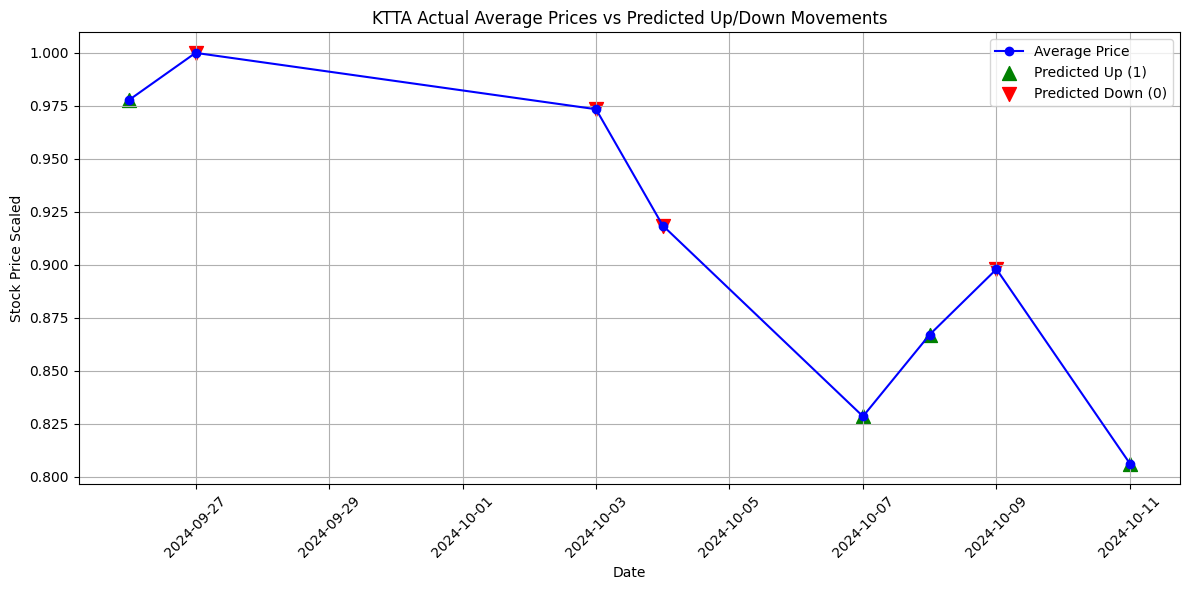

In [ ]:
# Merge merged_data_KTTA with results_df_sorted on 'Date' to ensure matching rows
merged_filtered = pd.merge(results_df_sorted, merged_data_APLD[['Date', 'Average']], on='Date', how='inner')

# Now actual_prices comes from the merged DataFrame
actual_prices = merged_filtered['Average']

# Check if the shapes match now
print("Shape of actual_prices:", actual_prices.shape)  # Should now be (10,)
print("Shape of results_df_sorted['Date']:", results_df_sorted['Date'].shape)  # Should also be (10,)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(merged_filtered['Date'], actual_prices.values, label='Average Price', marker='o', color='blue', linestyle='-')

# Overlay predicted Up (1) and Down (0) movements
# Up predictions (green markers)
plt.scatter(merged_filtered[merged_filtered['Predicted'] == 1]['Date'],
            actual_prices[merged_filtered['Predicted'] == 1].values,
            color='green', label='Predicted Up (1)', marker='^', s=100)

# Down predictions (red markers)
plt.scatter(merged_filtered[merged_filtered['Predicted'] == 0]['Date'],
            actual_prices[merged_filtered['Predicted'] == 0].values,
            color='red', label='Predicted Down (0)', marker='v', s=100)

# Final touches on the chart
plt.xlabel('Date')
plt.ylabel('Stock Price Scaled')
plt.title('KTTA Actual Average Prices vs Predicted Up/Down Movements')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import numpy as np

SelectedColumn1['Date'] = pd.to_datetime(SelectedColumn1['Date'])

scaler = MinMaxScaler()

features_to_scale = ['Open', 'Close', 'High', 'Low', 'Volume', 'Average', 'Lag1', 'EMA', 'RSI', 'Momentum']

scaler.fit(SelectedColumn1[features_to_scale])  # Fit the scaler to the original data

scaled_features = pd.DataFrame(scaler.transform(SelectedColumn1[features_to_scale]),
                               columns=features_to_scale)

scaled_data = pd.concat([SelectedColumn1[['Date']].reset_index(drop=True), scaled_features], axis=1)

<ipython-input-200-f469530b258b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Inverse transform the scaled data to original values
original_prices = scaler.inverse_transform(scaled_data[features_to_scale])

original_prices_df = pd.DataFrame(original_prices, columns=features_to_scale)

original_prices_df['Date'] = scaled_data['Date'].values

original_prices_df['Date'] = pd.to_datetime(original_prices_df['Date'])

print(original_prices_df.head())

   Open  Close  High   Low     Volume  Average    Lag1       EMA  RSI  \
0  2.70  2.515  2.72  2.49  4951100.0   2.6075     NaN  2.607500  NaN   
1  2.51  2.450  2.53  2.39  4752700.0   2.4800  2.6075  2.575625  NaN   
2  2.48  2.400  2.48  2.39  2458500.0   2.4400  2.4800  2.541719  NaN   
3  2.40  2.390  2.46  2.36  2690100.0   2.3950  2.4400  2.505039  NaN   
4  2.40  2.470  2.52  2.37  3208500.0   2.4350  2.3950  2.487529  NaN   

   Momentum       Date  
0       NaN 2024-04-15  
1       NaN 2024-04-16  
2       NaN 2024-04-17  
3       NaN 2024-04-18  
4       NaN 2024-04-19  


In [ ]:
original_prices_df['Date'] = pd.to_datetime(original_prices_df['Date'])

# Filter the original prices to only include data from September 26, 2024, onward
start_date = pd.to_datetime('2024-09-26')
filtered_prices_df = original_prices_df[original_prices_df['Date'] >= start_date]

# Filter the predictions to match the dates from the filtered original prices
predicted_dates = results_df_sorted['Date'].values
filtered_predictions = results_df_sorted[results_df_sorted['Date'] >= start_date]

# Extract actual prices corresponding to the predicted dates
actual_prices_for_predictions = filtered_prices_df[filtered_prices_df['Date'].isin(predicted_dates)]

In [ ]:
print("Length of filtered_prices_df:", len(filtered_prices_df))
print("Length of filtered_predictions:", len(filtered_predictions))
print("Actual Prices for Predictions Length:", len(actual_prices_for_predictions))

Length of filtered_prices_df: 13
Length of filtered_predictions: 8
Actual Prices for Predictions Length: 8


In [ ]:
predicted_dates = filtered_predictions['Date'].values

missing_dates = [date for date in predicted_dates if date not in filtered_prices_df['Date'].values]

print("Missing Dates:", missing_dates)

Missing Dates: []


In [ ]:
print("Filtered Prices Dates:")
print(filtered_prices_df['Date'].values)

print("\nFiltered Predictions Dates:")
print(filtered_predictions['Date'].values)

Filtered Prices Dates:
['2024-09-26T00:00:00.000000000' '2024-09-27T00:00:00.000000000'
 '2024-09-30T00:00:00.000000000' '2024-10-01T00:00:00.000000000'
 '2024-10-02T00:00:00.000000000' '2024-10-03T00:00:00.000000000'
 '2024-10-04T00:00:00.000000000' '2024-10-07T00:00:00.000000000'
 '2024-10-08T00:00:00.000000000' '2024-10-09T00:00:00.000000000'
 '2024-10-10T00:00:00.000000000' '2024-10-11T00:00:00.000000000'
 '2024-10-14T00:00:00.000000000']

Filtered Predictions Dates:
['2024-09-26T00:00:00.000000000' '2024-09-27T00:00:00.000000000'
 '2024-10-03T00:00:00.000000000' '2024-10-04T00:00:00.000000000'
 '2024-10-07T00:00:00.000000000' '2024-10-08T00:00:00.000000000'
 '2024-10-09T00:00:00.000000000' '2024-10-11T00:00:00.000000000']


In [ ]:
unique_predicted_dates = filtered_predictions['Date'].unique()

actual_prices_for_unique_predictions = filtered_prices_df[filtered_prices_df['Date'].isin(unique_predicted_dates)]

print("\nActual Prices for Unique Predictions:")
print(actual_prices_for_unique_predictions)


Actual Prices for Unique Predictions:
     Open  Close   High    Low      Volume  Average   Lag1       EMA  \
114  7.94   8.25  8.520  7.750  15998300.0    8.095  7.355  6.893143   
115  8.26   8.19  8.785  8.080  12869000.0    8.225  8.095  7.226107   
119  8.10   8.04  8.650  7.880  10249700.0    8.070  8.070  7.805272   
120  8.05   7.45  8.260  7.350  13842000.0    7.750  8.070  7.791454   
121  7.35   7.10  7.500  7.005   7893700.0    7.225  7.750  7.649841   
122  7.05   7.85  7.990  6.900  10339500.0    7.450  7.225  7.599880   
123  7.86   7.40  7.910  7.310  13323200.0    7.630  7.450  7.607410   
125  6.91   7.28  7.290  6.902   9052400.0    7.095  7.190  7.401043   

           RSI  Momentum       Date  
114  77.611936  2.230000 2024-09-26  
115  67.019019  2.099999 2024-09-27  
119  72.727266  2.480000 2024-10-03  
120  66.666663  1.430000 2024-10-04  
121  63.030301  0.400000 2024-10-07  
122  66.360290  0.770000 2024-10-08  
123  67.100373 -0.270000 2024-10-09  
125  55.

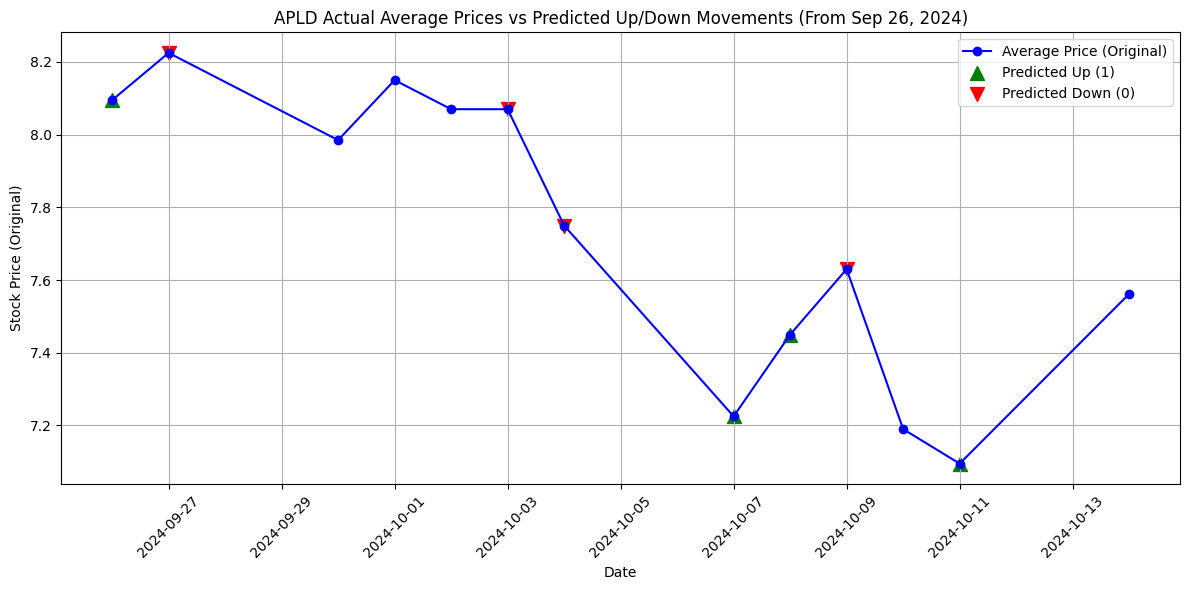

In [ ]:
plt.figure(figsize=(12, 6))

# Plot the original prices from the filtered DataFrame
plt.plot(filtered_prices_df['Date'], filtered_prices_df['Average'],
         label='Average Price (Original)', marker='o', color='blue', linestyle='-')

# Overlay predicted Up (1) and Down (0) movements
# Up predictions (green markers)
up_predictions = filtered_predictions[filtered_predictions['Predicted'] == 1]
down_predictions = filtered_predictions[filtered_predictions['Predicted'] == 0]

# Plot Up predictions
if not up_predictions.empty:
    up_dates = up_predictions['Date'].unique()  # Use unique dates
    up_actual_prices = actual_prices_for_unique_predictions[actual_prices_for_unique_predictions['Date'].isin(up_dates)]['Average'].values
    plt.scatter(up_dates, up_actual_prices, color='green', label='Predicted Up (1)', marker='^', s=100)

# Plot Down predictions
if not down_predictions.empty:
    down_dates = down_predictions['Date'].unique()  # Use unique dates
    down_actual_prices = actual_prices_for_unique_predictions[actual_prices_for_unique_predictions['Date'].isin(down_dates)]['Average'].values
    plt.scatter(down_dates, down_actual_prices, color='red', label='Predicted Down (0)', marker='v', s=100)

# Final touches on the chart
plt.xlabel('Date')
plt.ylabel('Stock Price (Original)')
plt.title('APLD Actual Average Prices vs Predicted Up/Down Movements (From Sep 26, 2024)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# **Investment Simulation to find ROI based on model prediction**

In [ ]:
portfolio_value = []
roi_values = []

initial_investment = 10000
cash = initial_investment
shares = 0
portfolio_value = []

In [ ]:
# Iterate through predictions and average prices
for i in range(len(filtered_predictions)):
    current_date = filtered_predictions.iloc[i]['Date']
    current_price = actual_prices_for_unique_predictions[actual_prices_for_unique_predictions['Date'] == current_date]['Average'].values[0]

    if filtered_predictions.iloc[i]['Predicted'] == 1:  # Predicted Up
        if cash > 0:
            shares_to_buy = cash // current_price  # Number of shares to buy
            cash -= shares_to_buy * current_price  # Deduct cash used for purchase
            shares += shares_to_buy  # Update shares held

    elif filtered_predictions.iloc[i]['Predicted'] == 0:  # Predicted Down
        if shares > 0:  # Only sell if we have shares
            cash += shares * current_price  # Sell all shares
            shares = 0  # Reset shares to 0

    # Calculate current portfolio value
    current_value = cash + shares * current_price
    portfolio_value.append(current_value)

    # Calculate ROI for the current date based on previous value
    if i == 0:
        roi = 0
    else:
        roi = (current_value - previous_value) / previous_value * 100

    roi_values.append(roi)

    # Update previous value for the next iteration
    previous_value = current_value

# Convert portfolio value to a DataFrame for easier analysis
portfolio_df = pd.DataFrame({
    'Date': filtered_predictions['Date'].values,
    'Portfolio Value': portfolio_value,
    'ROI (%)': roi_values  # Add ROI values to the DataFrame
})

# Display the portfolio DataFrame
print(portfolio_df)

        Date  Portfolio Value   ROI (%)
0 2024-09-26     10000.000000  0.000000
1 2024-09-27     10160.549847  1.605498
2 2024-10-03     10160.549847  0.000000
3 2024-10-04     10160.549847  0.000000
4 2024-10-07     10160.549847  0.000000
5 2024-10-08     10476.900048  3.113515
6 2024-10-09     10729.980142  2.415601
7 2024-10-11     10729.980142  0.000000


In [ ]:
final_portfolio_value = portfolio_df['Portfolio Value'].iloc[-1]  # Last value in the portfolio

roi = (final_portfolio_value - initial_investment) / initial_investment * 100

print(f"Final Portfolio Value: ${final_portfolio_value:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

Final Portfolio Value: $10729.98
Return on Investment (ROI): 7.30%
